# Clustering de usuarios
Agrupar a los usuarios en función de las funciones de las matrices de similitud generadas

---

In [162]:
import matplotlib.pyplot as plt

def plot_clusters(data, labels, centroids=None):
  # labels = kmedoids.labels_
  unique_labels = set(labels)
  colors = [
      plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))
  ]
  for k, col in zip(unique_labels, colors):

      class_member_mask = labels == k

      xy = data.values[class_member_mask]
      plt.plot(
          xy[:, 0],
          xy[:, 1],
          "o",
          markerfacecolor=tuple(col),
          markeredgecolor="k",
          markersize=6,
      )          

In [1]:
import numpy as np
import pandas as pd

In [2]:
users = pd.read_csv('data/Prado_users_similarity.csv', index_col=0)
prado_users = pd.read_csv('data/Prado_users_scaled.csv', index_col=0)

In [3]:
%%capture output
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(metric='precomputed', n_clusters=2)

kmedoids.fit(users)

In [4]:
import collections
collections.Counter(kmedoids.labels_)

Counter({0: 86, 1: 85})

In [5]:
kmedoids.medoid_indices_

array([140, 129], dtype=int64)

In [6]:
from sklearn.metrics import davies_bouldin_score

davies_bouldin_score(prado_users, kmedoids.labels_)

2.5089939869947426

In [7]:
def add_medoids(data):
  medoids = np.empty(len(data))
  for i in range(len(data)):
    for idx, m in enumerate(kmedoids.medoid_indices_):
      if i == m:
        medoids[i] = idx
        break
      else:
        medoids[i] = -1
  return medoids

In [10]:
users_clustered = pd.read_csv("data/Prado_users.csv")
users_clustered['cluster'] = kmedoids.labels_
users_clustered['medoid'] = add_medoids(users_clustered)

users_scaled_clustered = pd.read_csv("data/Prado_users_scaled.csv")
users_scaled_clustered['cluster'] = kmedoids.labels_
users_scaled_clustered['medoid'] = add_medoids(users_scaled_clustered)

In [11]:
users_clustered.to_csv("data/Prado_users_clusters.csv", index=0)
users_scaled_clustered.to_csv("data/Prado_users_scaled_clusters.csv", index=0)

## ------

In [132]:
%%capture output
K_MAX = 11
davies_boulding = np.zeros(K_MAX-2)

for k in range(2, K_MAX):
    km = KMedoids(metric='precomputed', n_clusters=k)
    km.fit(users)
    davies_boulding[k-2] = davies_bouldin_score(users, km.labels_)

[2.53121179 3.13107344 2.59678052 3.99842166 3.90233735 2.7047922
 3.24525618 2.50853736 2.98189906]


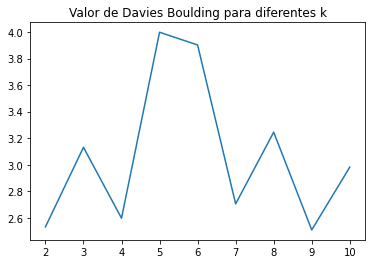

In [133]:
plt.plot(range(2, K_MAX), davies_boulding)
plt.title('Valor de Davies Boulding para diferentes k')

print(davies_boulding)
plt.show()

In [134]:
%%capture output
km = KMedoids(metric='precomputed', n_clusters=2)
km.fit(users)

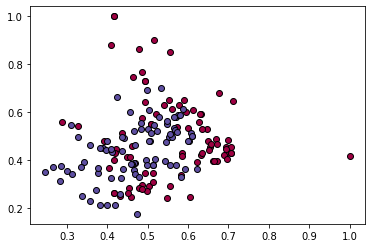

In [135]:
plot_clusters(users, km.labels_)

In [137]:
km.medoid_indices_

array([140, 129], dtype=int64)

## ------